In [4]:
pip install igraph
pip install pycairo

Note: you may need to restart the kernel to use updated packages.


## 数据处理

In [131]:
import pandas as pd
import numpy as np
top_following_data = pd.read_csv('./data/top_following_data.txt',sep='\t',encoding='utf-8')
top_following_data.head()

,source_id,source_follower_num,source_followee_num,source_answer_num,source_agree_num,source_thanks_num,target_id,target_follower_num,target_followee_num,target_answer_num,target_agree_num,target_thanks_num,source_avg_agree,target_avg_agree
0,李松蔚,242,1607172,192,775247,169121,陈佩斯,3.0,196441.0,6.0,130219.0,13357.0,4037.744792,21703.166667
1,Lachel,764,303674,69,438446,124327,丁香医生,312.0,3276017.0,763.0,4845800.0,1067088.0,6354.289855,6350.982962
2,Lachel,764,303674,69,438446,124327,李松蔚,242.0,1607172.0,192.0,775247.0,169121.0,6354.289855,4037.744792
3,Lachel,764,303674,69,438446,124327,知乎日报,241.0,124295015.0,17.0,958950.0,80599.0,6354.289855,56408.823529
4,Lachel,764,303674,69,438446,124327,温义飞,247.0,890314.0,181.0,577580.0,114780.0,6354.289855,3191.049724


In [13]:
top_following_data_noinfo = top_following_data[['source_id','target_id','source_avg_agree']]

In [14]:
# 过滤边缘点
top_following_data_noinfo = top_following_data_noinfo[top_following_data_noinfo.target_id.isin(list(top_following_data_noinfo.source_id))]

In [15]:
top_following_data_noinfo.head()

,source_id,target_id,source_avg_agree
0,李松蔚,陈佩斯,4037.744792
1,Lachel,丁香医生,6354.289855
2,Lachel,李松蔚,6354.289855
3,Lachel,知乎日报,6354.289855
4,Lachel,温义飞,6354.289855


## 点/边的数量

In [29]:
nodes_num = len(set(list(pd.concat([top_following_data_noinfo.source_id,top_following_data_noinfo.target_id],ignore_index =True ))))
print("点的数量：",nodes_num)

点的数量： 306


In [25]:
import networkx as nx
G = nx.DiGraph()
cnt = 0
for d in top_following_data_noinfo.iterrows():
    G.add_edge(d[1][0],d[1][1])
    cnt += 1
print('links number:', cnt)

links number: 3218


## 强连通分量

In [30]:
strongly_connected_components_dict = []
for cc in nx.strongly_connected_components(G):
    strongly_connected_components_dict.append(cc)

In [33]:
#强连通分量数量
len(strongly_connected_components_dict)

66

In [31]:
for i in strongly_connected_components_dict:
    print(len(i))

1
1
1
1
1
1
1
1
241
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [36]:
strongly_connected_components_list = list(strongly_connected_components_dict[8])
strongly_connected_components_list

['Necromanov',
 '落云歌',
 '知识库',
 '王豖',
 '刘嘉森',
 'Linux中国',
 '彭博',
 '小岩井',
 '撩妹大镖客',
 'vivi可爱多',
 '普外科曾医生',
 'chenqin',
 '直男未弯',
 'Doctor No',
 '侃叔',
 '金错刀',
 '园长',
 'sylvieluk',
 '王小七',
 '知乎视频',
 '巴赫爱喝胡辣汤',
 '叶泊枫',
 '黑猫厨房',
 '动漫N次番',
 '董悠悠',
 '唯伟老师',
 'SherryLi禅玉',
 '丁当',
 '张大大',
 '王王王',
 '清凇',
 '知乎科学',
 '游研社',
 '知乎',
 '马拓',
 '猫球',
 '魏则西',
 '王瑞',
 '小约翰',
 '知乎市场团队',
 '李昭鸿',
 'Kingfisher',
 '直宇',
 'Haojun',
 '柴桑',
 '欧阳靖宇',
 '顾希文',
 '注入爱',
 '大可',
 '丁香医生',
 '小Lin说',
 '宇宙生存法则',
 '温柔JUNZ',
 '知乎芝士平台',
 '谢春霖',
 '电动Emma',
 '纯韦',
 '猎奇症候群',
 '不老的老回',
 '葛巾',
 '李松蔚',
 '宋小狮',
 '暴走的阿姆',
 '陈宥澍',
 '渤海小吏',
 '周杰伧的小粉丝',
 '德川咪咪',
 '式微',
 '王尼玛',
 '王不二',
 '梁悦',
 '龙牙',
 '眠眠',
 '黄海广',
 '公路商店ontheroadstore',
 '王远成',
 '托卡马克之冠',
 '徐浪',
 '小酒',
 '刘焱',
 '真实职业故事',
 '江风有耳',
 '灰子',
 '夜行者陈拙',
 '写手一条城',
 '卢克文',
 '厂花蛋蛋姐',
 '任宏达',
 '栗之',
 '机器之心',
 '梁边妖',
 'Jason Hau',
 '李大琳',
 '夜家子鸢',
 '简浅',
 'Lachel',
 '上班摸鱼专业户',
 'labuladong',
 '发条橘子667',
 '商陆',
 '木山',
 '白发布衣',
 '集智科学家',
 '吞茶嚼花',
 '青雀',
 '企鹅君',
 '寺主人',
 '贝贝',
 '马伯庸',
 '共青

In [38]:
strongly_connected_components_data = page_rank_top_following_data[(page_rank_top_following_data.target_id.isin(strongly_connected_components_list))&(page_rank_top_following_data.source_id.isin(strongly_connected_components_list))]

In [39]:
strongly_connected_components_list

['Necromanov',
 '落云歌',
 '知识库',
 '王豖',
 '刘嘉森',
 'Linux中国',
 '彭博',
 '小岩井',
 '撩妹大镖客',
 'vivi可爱多',
 '普外科曾医生',
 'chenqin',
 '直男未弯',
 'Doctor No',
 '侃叔',
 '金错刀',
 '园长',
 'sylvieluk',
 '王小七',
 '知乎视频',
 '巴赫爱喝胡辣汤',
 '叶泊枫',
 '黑猫厨房',
 '动漫N次番',
 '董悠悠',
 '唯伟老师',
 'SherryLi禅玉',
 '丁当',
 '张大大',
 '王王王',
 '清凇',
 '知乎科学',
 '游研社',
 '知乎',
 '马拓',
 '猫球',
 '魏则西',
 '王瑞',
 '小约翰',
 '知乎市场团队',
 '李昭鸿',
 'Kingfisher',
 '直宇',
 'Haojun',
 '柴桑',
 '欧阳靖宇',
 '顾希文',
 '注入爱',
 '大可',
 '丁香医生',
 '小Lin说',
 '宇宙生存法则',
 '温柔JUNZ',
 '知乎芝士平台',
 '谢春霖',
 '电动Emma',
 '纯韦',
 '猎奇症候群',
 '不老的老回',
 '葛巾',
 '李松蔚',
 '宋小狮',
 '暴走的阿姆',
 '陈宥澍',
 '渤海小吏',
 '周杰伧的小粉丝',
 '德川咪咪',
 '式微',
 '王尼玛',
 '王不二',
 '梁悦',
 '龙牙',
 '眠眠',
 '黄海广',
 '公路商店ontheroadstore',
 '王远成',
 '托卡马克之冠',
 '徐浪',
 '小酒',
 '刘焱',
 '真实职业故事',
 '江风有耳',
 '灰子',
 '夜行者陈拙',
 '写手一条城',
 '卢克文',
 '厂花蛋蛋姐',
 '任宏达',
 '栗之',
 '机器之心',
 '梁边妖',
 'Jason Hau',
 '李大琳',
 '夜家子鸢',
 '简浅',
 'Lachel',
 '上班摸鱼专业户',
 'labuladong',
 '发条橘子667',
 '商陆',
 '木山',
 '白发布衣',
 '集智科学家',
 '吞茶嚼花',
 '青雀',
 '企鹅君',
 '寺主人',
 '贝贝',
 '马伯庸',
 '共青

In [40]:
len(np.union1d(strongly_connected_components_data.loc[:, 'source_id'], strongly_connected_components_data.loc[:, 'target_id']))

241

In [89]:
strongly_connected_components_data.columns = ['Source','Target','Weight']
strongly_connected_components_data.to_csv('./data/strongly_connected_components_data.csv',index=False,header=True,encoding='utf-8-sig')

## 强连通分量分析

In [118]:
import os, warnings, igraph
import numpy as np
import pandas as pd

class Jgraph(object):
    def __init__(self, matrix):
        '''传入一个关联矩阵(方阵matrix，该方阵为DataFrame数据格式)'''
        self.matrix = matrix
        self.__directed = False
        self.shape = self.matrix.shape
        self.name = self.matrix.index
        self.__check()
#         self.file_path = os.path.join(os.path.expanduser("~"), 'Desktop') + '\\social_network.png'
#         self.shortest_file_path = os.path.join(os.path.expanduser("~"), 'Desktop') + '\\shortest_paths_social_network.png'
        self.file_path = os.path.join("D:\\课件\\数据挖掘\\期末大作业\\fig") + '\\social_network.png'
        self.shortest_file_path = os.path.join("D:\\课件\\数据挖掘\\期末大作业\\fig") + '\\shortest_paths_social_network.png'
        self.g = igraph.Graph(directed=self.__directed)
#         self.visual_style = {"vertex_size": 10, "bbox": (800, 800), 'margin': 20, 'vertex_label_size': 15, 'edge_arrow_size': 0.5, 'vertex_label_dist': 2}
        self.visual_style = {"vertex_size": 10, "bbox": (800, 800), 'margin': 20, 'edge_arrow_size': 0.5}
        self.__graph()  # 关闭外部接口，避免添加数据导致结构出错
        self.__get_centrality()

    def __check(self):
        for i in range(self.shape[0]):
            if self.matrix.iloc[i][i] != 0:
                warnings.warn("Diagonal elements don't make sense, program has been setting it to 0")
                self.matrix.iloc[i][i] = 0
            for j in range(self.shape[1]):
                if self.matrix.iloc[i][j] != self.matrix.iloc[j][i]:
                    self.__directed = True

    def __nodes(self):
        self.g.add_vertices(self.shape[0])
#         self.g.vs['label'] = self.name
#         self.visual_style["vertex_label"] = self.g.vs["label"]
        self.g.vs['label'] = None
        self.visual_style["vertex_label"] = None
        

    def __edges(self):
        edges = []
        weight = []
        for index in range(self.shape[0]):
            for columns in range(self.shape[0]):
                if self.matrix.iloc[index, columns] != 0:
                    if self.g.is_directed():
                        edges.append((index, columns))
                    else:
                        if index <= columns:
                            break
                        edges.append((index, columns))
                    weight.append(self.matrix.iloc[index, columns])
        self.g.add_edges(edges)
        self.g.es['weight'] = weight

    def __sort_dict(self, dist):
        '''传入字典，按照键大小顺序重排序'''
        return dict(sorted(dist.items(), key=lambda x: x[1], reverse=True))

    def __graph(self):
        self.__nodes()
        self.__edges()
        self.base_visual_style = self.visual_style.copy()
        self.base_visual_style.update({'layout': self.g.layout("kamada_kawai")})
        igraph.plot(self.g, self.file_path, **self.base_visual_style)

    def __get_centrality(self):
        print('degree_centrality:\n', self.degree_centrality())
        print('closeness_centrality_without_weights:\n', self.closeness_centrality_without_weights())
        print('closeness_centrality:\n', self.closeness_centrality())
        print('betweenness_centrality_without_weights:\n', self.betweenness_centrality_without_weights())
        print('betweenness_centrality:\n', self.betweenness_centrality())

    def __from_name_get_id(self, *ids):
        labels = []
        for id in ids:
            labels.append(list(self.matrix.index).index(id))
        return labels

    def __get_eid_from_list(self, paths):
        id_list = []
        for path in paths:
            for i in range(len(path) - 1):
                id_list.append(self.g.get_eid(path[i], path[i + 1]))
        return id_list

    def directed(self):
        '''判断是否为有向图'''
        print('This is %sdirected graph' % (self.__directed * 'un'))

    def shortest_path(self):
        '''使用dijkstra算法深度优先搜索加权最短路径，并返回DataFrame对象'''
        return (pd.DataFrame(self.g.shortest_paths_dijkstra(weights=self.g.es['weight']), index=self.matrix.index, columns=self.matrix.columns))

    def shortest_path_without_weights(self):
        '''使用dijkstra算法深度优先搜索非加权最短路径，并返回DataFrame对象'''
        return pd.DataFrame(self.g.shortest_paths_dijkstra(), index=self.matrix.index, columns=self.matrix.columns)

    def page_rank(self):
        '''PageRank算法，返回字典'''
        return self.__sort_dict(dict(zip(self.g.vs['label'], self.g.pagerank())))

    def degree_centrality(self):
        '''自由度中心性'''
        return self.__sort_dict(dict(zip(self.g.vs['label'], np.array(self.g.degree()) / (self.shape[0] - 1))))

    def closeness_centrality(self):
        '''带权紧密度中间性'''
        return self.__sort_dict(dict(zip(self.g.vs['label'], self.g.closeness(weights=self.g.es['weight']))))

    def closeness_centrality_without_weights(self):
        '''不带权紧密度中心性'''
        return self.__sort_dict(dict(zip(self.g.vs['label'], self.g.closeness())))

    def betweenness_centrality(self):
        '''带权紧密度中间性'''
        return self.__sort_dict(dict(zip(self.g.vs['label'], np.array(self.g.betweenness(weights=self.g.es['weight'])) / ((self.shape[0] - 1) * (self.shape[0] - 2) / 2))))

    def betweenness_centrality_without_weights(self):
        '''不带权紧密度中心性'''
        return self.__sort_dict(dict(zip(self.g.vs['label'], np.array(self.g.betweenness()) / ((self.shape[0] - 1) * (self.shape[0] - 2) / 2))))

    def eigenvalue_centrality(self):
        '''带权特征值中心性'''
        return self.__sort_dict(dict(zip(self.g.vs['label'], self.g.eigenvector_centrality(weights=self.g.es['weight']))))

    def eigenvalue_centrality_without_weights(self):
        '''不带权特征值中心性'''
        return self.__sort_dict(dict(zip(self.g.vs['label'], self.g.eigenvector_centrality())))

    def shortest_paths_name(self, *ids):
        '''通过标签获取带权最短路径'''
        return self.shortest_paths_id(*self.__from_name_get_id(*ids))

    def shortest_paths_without_weights_name(self, *ids):
        '''通过标签获取不带权最短路径'''
        return self.shortest_paths_without_weights_id(*self.__from_name_get_id(*ids))

    def shortest_paths_without_weights_id(self, begin, end):
        '''通过id获取不带权最短路径'''
        shortest_paths = self.g.get_all_shortest_paths(self.g.vs[begin], self.g.vs[end])  # 储存最短路径的列表
        edges_id = self.__get_eid_from_list(shortest_paths)
        shortest_visual_style = self.visual_style.copy()
        shortest_visual_style["edge_width"] = [4 if i in edges_id else 1 for i in range(len(self.g.es))]
        igraph.plot(self.g, self.shortest_file_path, **shortest_visual_style)
        for (d, shortest_path) in enumerate(shortest_paths):
            shortest_path_list = [self.matrix.index[shortest_path[i]] for i in range(len(shortest_path))]
            print('Path%d: %s' % (d + 1, '->'.join(shortest_path_list)))

    def shortest_paths_id(self, begin, end):
        '''通过 id 获取最短路径'''
        shortest_paths = self.g.get_all_shortest_paths(self.g.vs[begin], self.g.vs[end], weights=self.g.es['weight'])  # 储存最短路径的列表
        edges_id = self.__get_eid_from_list(shortest_paths)
        shortest_visual_style = self.visual_style.copy()
        shortest_visual_style["edge_width"] = [4 if i in edges_id else 1 for i in range(len(self.g.es))]
        igraph.plot(self.g, self.shortest_file_path, **shortest_visual_style)
        for (d, shortest_path) in enumerate(shortest_paths):
            shortest_path_list = [self.matrix.index[shortest_path[i]] for i in range(len(shortest_path))]
            print('Path%d: %s' % (d + 1, '->'.join(shortest_path_list)))

    def community_edge_betweenness(self):
        '''带权Girvan-Newman算法社区划分'''
        return igraph.plot(self.g.community_edge_betweenness(weights=self.g.es['weight']).as_clustering(), self.file_path, **self.visual_style)

    def community_edge_betweenness_without_weights(self):
        '''不带权Girvan-Newman算法社区划分'''
        return igraph.plot(self.g.community_edge_betweenness().as_clustering(), self.file_path, **self.visual_style)

def link2matrix(link):
    # 数据格式参考权力的游戏，将连接类转化为关联矩阵
    label = np.union1d(link.iloc[:, 0], link.iloc[:, 1])
    matrix = pd.DataFrame(0, index=label, columns=label)
    for i in range(len(link.iloc[:, 0])):
        matrix.loc[link.iloc[i, 0], link.iloc[i, 1]] += link.iloc[i, 2]
    return matrix

In [41]:
import networkx as nx
G = nx.DiGraph()
cnt = 0
for d in strongly_connected_components_data.iterrows():
    G.add_edge(d[1][0],d[1][1])
    cnt += 1
print('links number:', cnt)

links number: 2901


In [103]:
data = link2matrix(strongly_connected_components_data)

In [119]:
g = Jgraph(data)

degree_centrality:
 {None: 0.1375}
closeness_centrality_without_weights:
 {None: 0.498960498960499}
closeness_centrality:
 {None: 0.00013727660233931314}
betweenness_centrality_without_weights:
 {None: 0.0120916673968441}
betweenness_centrality:
 {None: 0.027196652719665274}


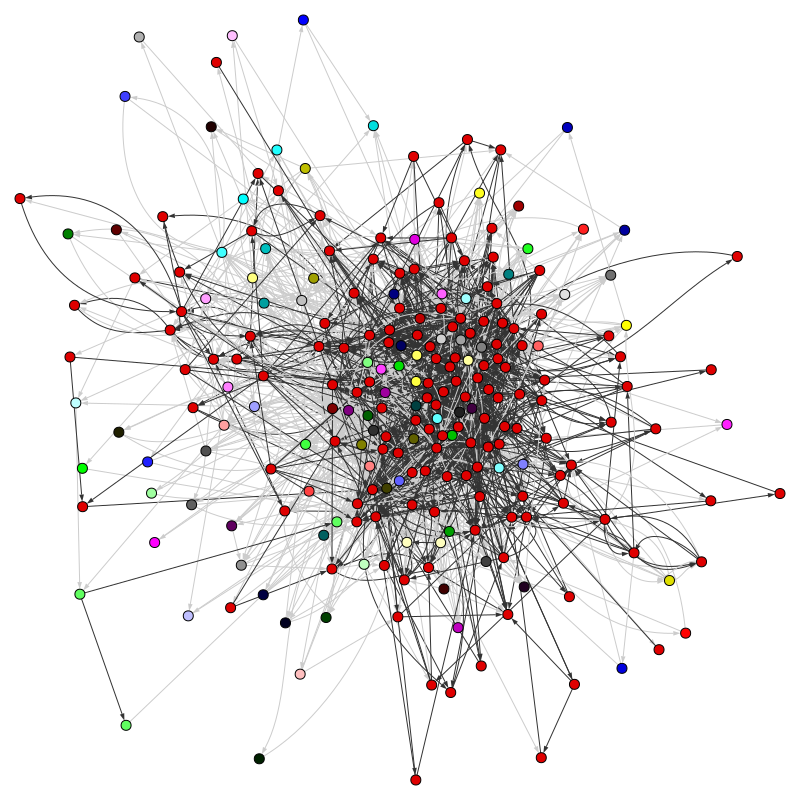

In [120]:
g.community_edge_betweenness_without_weights()

In [45]:
#平均路径长度
nx.average_shortest_path_length(G)

3.06533540802213

In [47]:
# 最短路径
shortest_path_pd = g.shortest_path_without_weights()

In [48]:
shortest_path_pd

,CVer计算机视觉,DDAA117,Doctor No,Haojun,InsDaily,Jason Hau,Jennyyy,Kingfisher,Lachel,Linux中国,...,马伯庸,马壮实,马拓,高冷冷,魏则西,黄海,黄海广,黑猫厨房,黛西巫巫,龙牙
CVer计算机视觉,0,6,6,3,4,4,3,3,3,3,...,2,3,3,4,4,3,2,4,4,2
DDAA117,5,0,7,4,5,5,4,4,4,6,...,3,4,4,4,5,4,5,4,4,3
Doctor No,6,7,0,4,5,5,4,3,4,7,...,3,5,4,5,5,4,6,5,4,3
Haojun,3,6,6,0,4,4,2,2,2,3,...,2,3,3,3,3,3,2,2,3,3
InsDaily,4,6,6,3,0,4,2,3,1,5,...,2,3,4,3,4,2,4,5,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黄海,4,4,4,2,2,4,1,2,1,5,...,2,2,3,2,2,0,4,3,2,1
黄海广,2,6,6,2,4,4,3,3,3,2,...,2,3,3,3,4,3,0,2,3,2
黑猫厨房,5,7,7,3,5,5,3,4,3,6,...,2,4,4,4,4,3,5,0,4,3
黛西巫巫,5,5,5,3,3,4,2,3,2,6,...,3,3,4,1,3,1,5,4,0,2


In [50]:
#半径
min(shortest_path_pd.max())

4

In [51]:
#直径
max(shortest_path_pd.max())

9

## 中心点

In [54]:
shortest_path_series = shortest_path_pd.max()

In [55]:
shortest_path_series[shortest_path_series==4]

chenqin    4
张译         4
曾加         4
马伯庸        4
dtype: int64

In [73]:
g.shortest_paths_without_weights_name('马伯庸','张译') 
g.shortest_paths_without_weights_name('马伯庸','chenqin') 
g.shortest_paths_without_weights_name('马伯庸','曾加') 
g.shortest_paths_without_weights_name('chenqin','曾加') 
g.shortest_paths_without_weights_name('张译','曾加') 
g.shortest_paths_without_weights_name('张译','chenqin') 

Path1: 马伯庸->朱炫->张译
Path1: 马伯庸->葛巾->chenqin
Path1: 马伯庸->葛巾->曾加
Path2: 马伯庸->梁边妖->曾加
Path1: chenqin->葛巾->曾加
Path2: chenqin->李松蔚->曾加
Path1: 张译->郎朗->SherryLi禅玉->曾加
Path1: 张译->郎朗->SherryLi禅玉->chenqin


In [90]:
myfig = g.community_edge_betweenness_without_weights()
myfig

In [134]:
top_following_data[top_following_data.target_id=='郎朗']

,source_id,source_follower_num,source_followee_num,source_answer_num,source_agree_num,source_thanks_num,target_id,target_follower_num,target_followee_num,target_answer_num,target_agree_num,target_thanks_num,source_avg_agree,target_avg_agree
1045,电动Emma,132134,1359,117,405568,63777,郎朗,415249.0,9.0,17.0,240685.0,31727.0,3466.393162,14157.941176
1158,商陆,18057,918,70,213199,29773,郎朗,415249.0,9.0,17.0,240685.0,31727.0,3045.700000,14157.941176
1237,曾加,556564,872,525,1492613,340862,郎朗,415249.0,9.0,17.0,240685.0,31727.0,2843.072381,14157.941176
1696,SherryLi禅玉,190415,460,45,165328,61765,郎朗,415249.0,9.0,17.0,240685.0,31727.0,3673.955556,14157.941176
1777,歌者的影子,62427,84,123,527807,67441,郎朗,415249.0,9.0,17.0,240685.0,31727.0,4291.113821,14157.941176
2040,李靖,128716,317,25,130140,38748,郎朗,415249.0,9.0,17.0,240685.0,31727.0,5205.600000,14157.941176
2203,小猫倩倩,321642,811,198,809197,320164,郎朗,415249.0,9.0,17.0,240685.0,31727.0,4086.853535,14157.941176
2279,西鱼摸岸,30179,45,46,266656,21486,郎朗,415249.0,9.0,17.0,240685.0,31727.0,5796.869565,14157.941176
2358,张译,961788,21,26,501055,75377,郎朗,415249.0,9.0,17.0,240685.0,31727.0,19271.346154,14157.941176
2663,郁清叔叔,141946,110,148,420509,92265,郎朗,415249.0,9.0,17.0,240685.0,31727.0,2841.277027,14157.941176


### Centrality and Importance

In [11]:
def pagerank_hits(G):
    # PageRank
    pr = nx.pagerank(G, alpha=0.85)
    prsorted = sorted(pr.items(), key=lambda x: x[1], reverse=True)
    print('\npagerank top 10:\n')
    for p in prsorted[:10]:
        print(p[0], p[1])
    
    # HITS
    hub, auth = nx.hits(G, max_iter=2000)
    print('\nhub top 10:\n')
    for h in sorted(hub.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(h[0], h[1])
    print('\nauth top 10:\n')   
    for a in sorted(auth.items(), key=lambda x: x[1], reverse=True)[:10]:     
        print(a[0], a[1])

In [12]:
pagerank_hits(top_graph)


pagerank top 10:

知乎日报 0.04356252341315649
知乎小管家 0.03499341214239902
马伯庸 0.026568589495010685
郎朗 0.02467989930489073
李松蔚 0.024134191502693105
丁香医生 0.02201760951681888
朱炫 0.021562743728756103
葛巾 0.021107030198526867
chenqin 0.019680325621280338
梁边妖 0.018876269337148054

hub top 10:

梁悦 0.023164561595000063
小猫倩倩 0.02026179172531068
戈玄白今天要做题 0.020089652244048156
商陆 0.019456375315444866
人间火蜜桃 0.018274725748567054
电动Emma 0.017626667590462764
厂花蛋蛋姐 0.01751181192238822
田浩 0.015850619407031762
栗之 0.01583403867814461
潇峰学长 0.015594315922439133

auth top 10:

朱炫 0.02350786624848316
梁边妖 0.023231273636014956
马伯庸 0.022018073874873166
李松蔚 0.0215528325375999
知乎小管家 0.021222121203205692
曾加 0.020670038404489357
葛巾 0.020224505423095673
河森堡 0.020015449792733
肥肥猫 0.019203521215951695
丁香医生 0.018777224086553027


In [13]:
pagerank_hits(waist_graph)


pagerank top 10:

张佳玮 0.018218781298713804
知乎机构号团队 0.012228237062269602
知乎汽车 0.008740721962503329
知乎校园 0.007818226684596846
动机在杭州 0.007741818731517808
王瑞恩 0.007720702158448368
megadrive2 0.007274496147376589
司马懿 0.007056136964855295
KnowYourself 0.006922709318287213
李雷 0.005913051837014087

hub top 10:

万金油 0.011817087785641594
欧阳畅 0.007246085077398742
周宓 0.007237031028355694
翡柏 0.007155700056277434
山羊月 0.0065728246414588866
杨大宝在思考 0.006329694880595819
李征义 0.006228469113444351
王瑞恩 0.006162372286124515
梨花与虎 0.0060557959245149
李傲文 0.006004686182974593

auth top 10:

张佳玮 0.009217847085828288
王诺诺 0.0068615029342077765
王瑞恩 0.006416146973772932
谢熊猫君 0.0063760402945718655
苏莉安 0.0060807070266883
司马懿 0.005966705970318036
李雷 0.005958085592689502
动机在杭州 0.005753126772519532
汪惟 0.005681748913974846
豆子 0.005663895463655737


In [14]:
def centrality(G):
    in_degree = nx.in_degree_centrality(G)
    print('in degree centrality top 10:\n')
    for d in sorted(in_degree.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(d[0], d[1])
    
    betweenness = nx.betweenness_centrality(G, normalized=True)
    print('\nbetweenness centrality top 10:\n')
    for d in sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(d[0], d[1])
    
    closeness = nx.closeness_centrality(G)
    print('\ncloseness centrality top 10:\n')
    for d in sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(d[0], d[1])
    
    user_betweenness_list = sorted(betweenness.values(), reverse=True)
    plt.figure('Betweenness Distribution', dpi=120)
    plt.title('Betweenness Distribution', fontsize=14)
    plt.xlabel('Indivisual User', fontsize=14)
    plt.ylabel('Betweeness of the User', fontsize=14)       
    plt.scatter(list(range(len(user_betweenness_list))), user_betweenness_list, color='k')

    user_closeness_list = sorted(closeness.values(), reverse=True)
    plt.figure('Closeness Distribution', dpi=120)
    plt.title('Closeness Distribution', fontsize=14)
    plt.xlabel('Indivisual User', fontsize=14)
    plt.ylabel('Closeness of the User', fontsize=14)       
    plt.scatter(list(range(len(user_closeness_list))), user_closeness_list, color='k')
    
    plt.show()

in degree centrality top 10:

知乎小管家 0.29583333333333334
丁香医生 0.2791666666666667
李松蔚 0.275
朱炫 0.2708333333333333
马伯庸 0.2583333333333333
梁边妖 0.25416666666666665
河森堡 0.22083333333333333
葛巾 0.2125
小约翰 0.20833333333333334
曾加 0.20833333333333334

betweenness centrality top 10:

小约翰 0.1378629911643918
丁香医生 0.09091913733089037
知乎日报 0.0693214828941481
曾加 0.06572671605255294
河森堡 0.06054125444085454
梁悦 0.059722542088258786
朱炫 0.058679266953659145
巴赫爱喝胡辣汤 0.05280074500557632
梁边妖 0.04838351609578015
田浩 0.04346667493039063

closeness centrality top 10:

知乎小管家 0.5357142857142857
马伯庸 0.5274725274725275
李松蔚 0.5084745762711864
丁香医生 0.5063291139240507
朱炫 0.4948453608247423
chenqin 0.4928131416837782
河森堡 0.48484848484848486
梁边妖 0.48484848484848486
曾加 0.4838709677419355
知乎日报 0.482897384305835


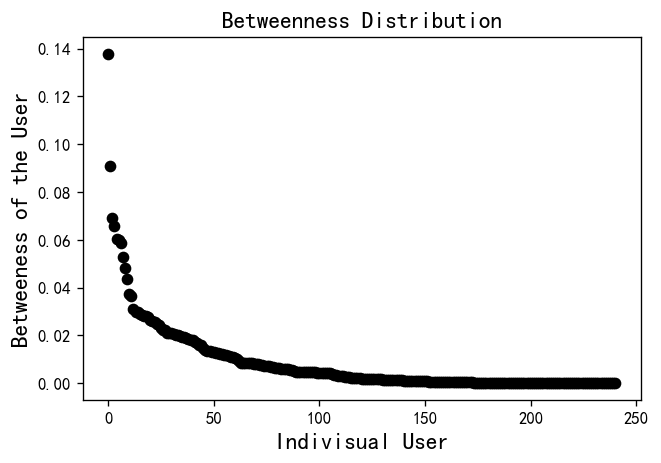

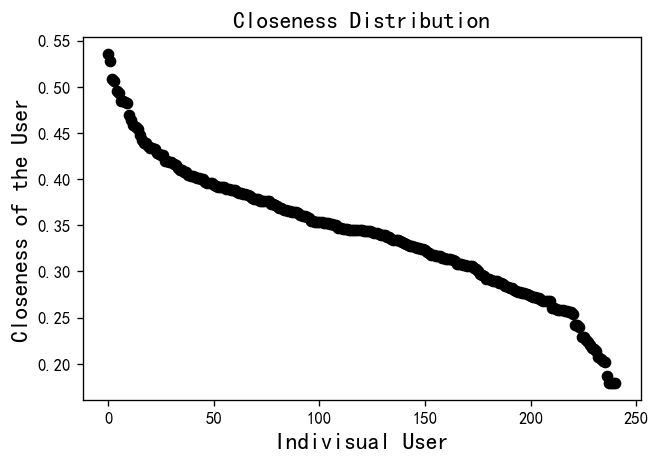

In [15]:
centrality(top_graph)

in degree centrality top 10:

张佳玮 0.43967828418230565
司马懿 0.2100089365504915
动机在杭州 0.2001787310098302
KnowYourself 0.19302949061662197
王诺诺 0.1867739052725648
李雷 0.18588025022341376
王瑞恩 0.18498659517426272
王子君 0.1778373547810545
warfalcon 0.17605004468275245
megadrive2 0.17515638963360142

betweenness centrality top 10:

万金油 0.0625424909549103
流浪的蛤蟆 0.04506058295637979
Sean Ye 0.043336827264829174
李征义 0.03877530820904552
王瑞恩 0.033166315280652704
张佳玮 0.02980786859599036
司马懿 0.02932632813962928
路人甲 0.028700217985074668
任玩堂 0.028449131355632967
warfalcon 0.028115932560105993

closeness centrality top 10:

张佳玮 0.6065040650406504
司马懿 0.5065640561339972
动机在杭州 0.5036003600360036
王瑞恩 0.49910793933987513
李雷 0.4968916518650089
KnowYourself 0.49360388178209086
王诺诺 0.489501312335958
megadrive2 0.48907342657342656
warfalcon 0.4860990443092963
王子君 0.4848353552859619


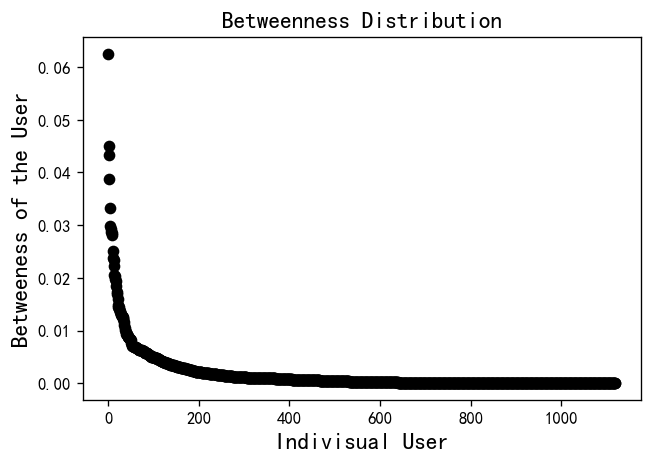

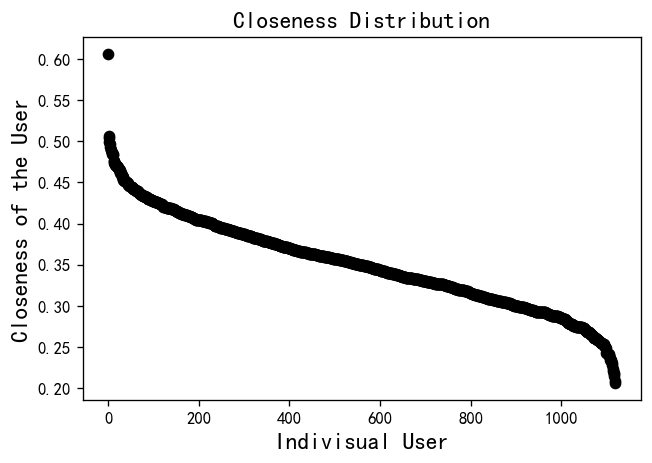

In [16]:
centrality(waist_graph)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

plt.rcParams['font.sans-serif']=['SimHei']

top_following = pd.read_csv('./top_following_data.txt',sep='\t',encoding='utf-8')
waist_following = pd.read_csv('./waist_following_data.txt',sep='\t',encoding='utf-8')
top_data = top_following[['source_id', 'target_id']]
waist_data = waist_following[['source_id', 'target_id']]

def draw_network(data):
    G = nx.DiGraph()
    cnt = 0
    for d in data.iterrows():
        G.add_edge(d[1][0],d[1][1])
        cnt += 1
    print('number of nodes:', G.number_of_nodes())
    print('links number:', cnt)
    return G

def strongly_connected_components(data):    
    G = draw_network(data)
    
    scomponents = nx.strongly_connected_components(G)
    length_list, scomponent_list = [], []
    for c in scomponents:
        length_list.append(len(c))
        scomponent_list.append(list(c))
    print('components nodes distribution:', sorted(length_list, reverse=True))
    max_scomponent = scomponent_list[np.argmax(length_list)]
    return max_scomponent

top_max_scomponent_list = strongly_connected_components(top_data)

waist_max_scomponent_list = strongly_connected_components(waist_data)

def strongly_connected_components_graph(strongly_connected_components_list, following_data):
    strongly_connected_components_data = following_data[(following_data.target_id.isin(strongly_connected_components_list))&(following_data.source_id.isin(strongly_connected_components_list))]
    graph = draw_network(strongly_connected_components_data)
    print('average_shortest_path_length:', nx.average_shortest_path_length(graph))
    print('diameter:', nx.diameter(graph))
    print('radius:', nx.radius(graph))
    print('density:', nx.density(graph))
    print('center of the graph:', nx.center(graph))
    return graph

top_graph = strongly_connected_components_graph(top_max_scomponent_list, top_data)

waist_graph = strongly_connected_components_graph(waist_max_scomponent_list, waist_data)

def pagerank_hits(G):
    # PageRank
    pr = nx.pagerank(G, alpha=0.85)
    prsorted = sorted(pr.items(), key=lambda x: x[1], reverse=True)
    print('\npagerank top 10:\n')
    for p in prsorted[:10]:
        print(p[0], p[1])
    
    # HITS
    hub, auth = nx.hits(G, max_iter=2000)
    print('\nhub top 10:\n')
    for h in sorted(hub.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(h[0], h[1])
    print('\nauth top 10:\n')   
    for a in sorted(auth.items(), key=lambda x: x[1], reverse=True)[:10]:     
        print(a[0], a[1])

pagerank_hits(top_graph)

pagerank_hits(waist_graph)

def centrality(G):
    in_degree = nx.in_degree_centrality(G)
    print('in degree centrality top 10:\n')
    for d in sorted(in_degree.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(d[0], d[1])
    
    betweenness = nx.betweenness_centrality(G, normalized=True)
    print('\nbetweenness centrality top 10:\n')
    for d in sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(d[0], d[1])
    
    closeness = nx.closeness_centrality(G)
    print('\ncloseness centrality top 10:\n')
    for d in sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(d[0], d[1])
    
    user_betweenness_list = sorted(betweenness.values(), reverse=True)
    plt.figure('Betweenness Distribution', dpi=120)
    plt.title('Betweenness Distribution', fontsize=14)
    plt.xlabel('Indivisual User', fontsize=14)
    plt.ylabel('Betweeness of the User', fontsize=14)       
    plt.scatter(list(range(len(user_betweenness_list))), user_betweenness_list, color='k')

    user_closeness_list = sorted(closeness.values(), reverse=True)
    plt.figure('Closeness Distribution', dpi=120)
    plt.title('Closeness Distribution', fontsize=14)
    plt.xlabel('Indivisual User', fontsize=14)
    plt.ylabel('Closeness of the User', fontsize=14)       
    plt.scatter(list(range(len(user_closeness_list))), user_closeness_list, color='k')
    
    plt.show()

centrality(top_graph)

centrality(waist_graph)

